In [1]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

# Pylint parameters
%config Completer.use_jedi = False

# Measure Runtime
# !pip install ipython-autotime
# %load_ext autotime

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
!pwd

/Users/guillaume/code/migasar/kaggle-shopee-wagon552/notebooks


In [4]:
train_data = pd.read_csv('../raw_data/shopee-product-matching/train.csv') 
test_data = pd.read_csv('../raw_data/shopee-product-matching/test.csv')
ss_data = pd.read_csv('../raw_data/shopee-product-matching/sample_submission.csv', index_col = 0)

In [5]:
train_df = train_data.copy()
test_df = train_data.copy()
ss_df = train_data.copy()

In [6]:
train_df.size

171250

In [7]:
train_df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [9]:
train_df.describe()

,label_group
count,3.425000e+04
mean,2.128611e+09
std,1.234630e+09
min,2.580470e+05
25%,1.050720e+09
50%,2.120410e+09
75%,3.187910e+09
max,4.294197e+09


In [10]:
train_df['image'].shape

(34250,)

In [11]:
train_df.nunique()

posting_id     34250
image          32412
image_phash    28735
title          33117
label_group    11014
dtype: int64

In [12]:
train_df.isna().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

In [13]:
# pip install scikit-image

In [14]:
from skimage import io
import os

In [15]:
def trans_img(file_name):
    filename = os.path.abspath(os.path.join('../raw_data/shopee-product-matching/train_images', file_name))
    return io.imread(filename)

In [16]:
img_1 = trans_img('00039780dfc94d01db8676fe789ecd05.jpg')

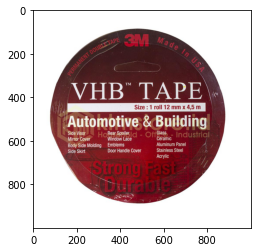

In [17]:
plt.imshow(img_1)

# Image preprocessing

## Resizing

We want to reshape the images in smaller size (state-of-the-art networks are trained on (224,224,3) images / tensors)

In [18]:
from skimage import io
import os

def get_img_size():
    images = [image for image in train_df['image']]
    img_shape = []
    for image in images[11:76]:
        img = trans_img(image)
        x = img.shape
        img_shape.append(x)
        size_img = pd.DataFrame(img_shape)
    return size_img

In [19]:
img_size_df = get_img_size()
img_size_df.sort_values(by=0, ascending=False)

,0,1,2
9,4501,4500,3
56,1024,1024,3
16,1024,1024,3
15,1024,1024,3
28,1024,1024,3
...,...,...,...
64,640,640,3
11,604,604,3
8,595,595,3
2,449,449,3


In [20]:
max(img_size_df[1]), min(img_size_df[1])

(4500, 314)

In [21]:
sizes_set = set(img_size_df[0])
def sizes_ratio():
    for size in sizes_set:
        return img_size_df[0].value_counts()/len(train_df['image'])*100

In [22]:
len(sizes_set)

18

In [23]:
x = sizes_ratio()
x.sort_values(ascending=False)


640     0.055474
1024    0.043796
700     0.020438
800     0.017518
1000    0.014599
960     0.002920
4501    0.002920
604     0.002920
595     0.002920
720     0.002920
449     0.002920
699     0.002920
650     0.002920
314     0.002920
820     0.002920
669     0.002920
665     0.002920
748     0.002920
Name: 0, dtype: float64

In [24]:
def get_unsquarred_ratio() :
    records = img_size_df.to_records(index=False)
    list_sizes = list(records)
    print(list_sizes)
    unsquarred =[]
    for x in list_sizes:
        if x[0]!=x[1]:
            unsquarred.append(x[0])
    return f"Ratio of unsquarred images : {round(len(unsquarred)/len(train_df['image']), 3)*100} %"

In [25]:
get_unsquarred_ratio()

[(1000, 1000, 3), (1000, 1000, 3), (449, 449, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (800, 800, 3), (314, 314, 3), (595, 595, 3), (4501, 4500, 3), (700, 700, 3), (604, 604, 3), (665, 665, 3), (700, 700, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (700, 700, 3), (700, 700, 3), (640, 640, 3), (640, 640, 3), (800, 800, 3), (640, 640, 3), (640, 640, 3), (640, 640, 3), (1000, 1000, 3), (1000, 1000, 3), (720, 720, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (700, 700, 3), (699, 699, 3), (800, 800, 3), (640, 640, 3), (700, 700, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (1024, 1024, 3), (800, 800, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (1024, 1024, 3), (1024, 1024, 3), (700, 700, 3), (820, 820, 3), (640, 640, 3), (960, 960, 3), (640, 640, 3), (748, 748, 3), (800, 800, 3), (1024, 1024, 3), (1000, 1000, 3), (1024, 1024, 3), (640, 640, 3), (640, 640, 3), (800, 800, 3), (669, 669, 3), (650, 650, 3

'Ratio of unsquarred images : 0.0 %'

Turning images into arrays of size (224, 224, 3) 

In [26]:
from PIL import Image

def drop_unsquarred():
    df_squarred = []
    images = [image for image in train_df['image']]
    for image in images:
        image_size=Image.open(f"../raw_data/shopee-product-matching/train_images/{image}").size
        if image_size[0] == image_size[1]:
            df_squarred.append(image)
    return df_squarred

In [27]:
df_squarred = drop_unsquarred()
df_squarred

['0000a68812bc7e98c42888dfb1c07da0.jpg',
 '00039780dfc94d01db8676fe789ecd05.jpg',
 '000a190fdd715a2a36faed16e2c65df7.jpg',
 '00117e4fc239b1b641ff08340b429633.jpg',
 '00136d1cf4edede0203f32f05f660588.jpg',
 '0013e7355ffc5ff8fb1ccad3e42d92fe.jpg',
 '00144a49c56599d45354a1c28104c039.jpg',
 '0014f61389cbaa687a58e38a97b6383d.jpg',
 '0019a3c6755a194cb2e2c12bfc63972e.jpg',
 '001be52b2beec40ddc1d2d7fc7a68f08.jpg',
 '001d7f5d9a2fac714f4d5f37b3baffb4.jpg',
 '001e11145b8e9bf5ac51110c0fdd8697.jpg',
 '001e11145b8e9bf5ac51110c0fdd8697.jpg',
 '001f4c8331d0554d133b10d85b7fafb2.jpg',
 '001f5580b058c6b8e33132190a757318.jpg',
 '002039aaf8618627a0442d5e89e5dda6.jpg',
 '0027aaf8dd8bdbf0e4f2c19024e436cf.jpg',
 '00286d2760e433a8a01cbd9e056144f7.jpg',
 '002f978c58a44a00aadfca71c3cad2bb.jpg',
 '00303ad1c062fdeaf5f41b9ffb71a5fb.jpg',
 '003524b70715bf6bfa00451ca08e66e0.jpg',
 '0035b8fc42955c0fa2301b68e2ffe861.jpg',
 '00369839c7d94411e54437b7cf59b603.jpg',
 '003906c6c6bba4cde15e5e854dba8f6d.jpg',
 '003a6fbbdf88f0

In [28]:
def resize_save_unsquarred():
    img_squarred = []
    for image in df_squarred:
        image_open=Image.open(f"../raw_data/shopee-product-matching/train_images/{image}").resize((100,100))
        image_open.save(f"../raw_data/shopee-product-matching/train_images/resized/{image}")
        img_squarred.append(image_open)
    return img_squarred

In [29]:
img_squarred = resize_save_unsquarred()

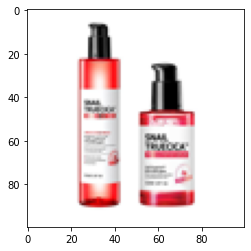

In [30]:
plt.imshow(img_squarred[1100])

In [31]:
# train_df['resized_image'] = pd.read_csv('../raw_data/shopee-product-matching/train_images/resized/train.csv') 

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Minimal Network + Common tricks + First hyperparameters tests

model = models.Sequential()

# First convolution & max-pooling
model.add(layers.Conv2D(100, (10,4), strides=(2,2), input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPool2D(pool_size=(3,3)))

# Second convolution & max-pooling
model.add(layers.Conv2D(32, (3,3), strides=(2,2), padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# ––– This is where your Data Scientist skills begin

In [33]:
from skimage.transform import resize
from skimage import io
import os

def resize_images():
    images = [image for image in train_df['image']]
    # img_shape = []
    for image in images[0:10]:
        image_path =  f'{image}'
        filename = os.path.abspath(os.path.join('../raw_data/shopee-product-matching/train_images/resized/', image_path))
        img = io.imread(filename)
        x = img.shape
        # img_shape.append(x)
        # print(x)
        # print(img_shape)
        # size_img = pd.DataFrame(img_shape)
        # print(size_img)
        # print(img_shape)
        # for img in size_img.loc[0,[0, 1]]:
            #print(img[0],img[1])
        #image_resized = resize(img, (img_shape[0][0] // img_shape[0][0] * 100, img_shape[0][1] // img_shape[0][1] * 100), anti_aliasing=True)
        # train_df['shape_resized'] = x
    return train_df

In [34]:
resize_images()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


## Intensity normalization

Neural networks converge faster if the inputs are somewhat normalized. Therefore we want to transform the image pixels with values between 0 and 255 (for each color) into values between -1 and 1, thanks to Keras libraries (or just by dividing all the data by 255)

## Data augmentation

Creation of additionnal data to explore : 
- Mirror
- Crop
- rotations
- slight transformation of the colors
- change of the textures
- "photoshop effects": blur, halo, ...
- deformations
- ...

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

model = Sequential()
model.add(Reshape((5*5*1,), input_shape=(5,5,1)))  # This flattens the (5, 5, 1) image to a vector of size 25
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax')) 

# Preprocessing on titles 

In [36]:
# pip install nltk

- Lowercase
- remove numbers
- remove punctuation
- remove stop words
- select important words with stemmer

In [37]:
#labels
print(f"label_group unique values: {train_df['label_group'].nunique()}")

label_group unique values: 11014


In [38]:
groups_df = train_df["label_group"].value_counts().reset_index()
groups_df.columns = ["group", "count"]
print("Max no. of apparitions in 1 group: {}".format(groups_df["count"].max()), "\n" +
      "Min no. of apparitions in 1 group: {}".format(groups_df["count"].min()))

Max no. of apparitions in 1 group: 51 
Min no. of apparitions in 1 group: 2


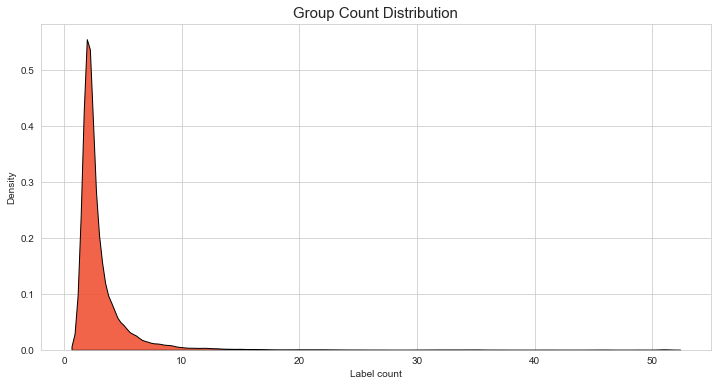

In [39]:
# Plot labels distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Group Count Distribution', fontsize = '15')
sns.kdeplot(groups_df['count'], fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Label count')
plt.show();

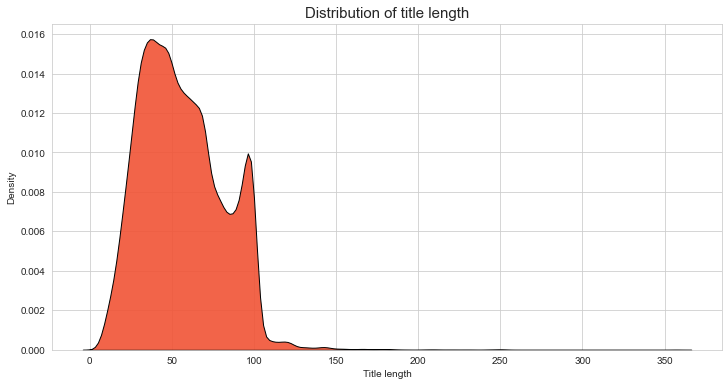

In [40]:
# Plot titles length distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Distribution of title length', fontsize = '15')
sns.kdeplot(train_df['title'].apply(lambda x: len(x)), fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Title length')
plt.show();

In [41]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [42]:
import string 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

unpreproc_title = train_df["title"][1]
print(f"Before: {unpreproc_title}")
lower_title = unpreproc_title.lower()
print(f"Lower case: {lower_title}")
punct = "!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]:"
rem_punct = lower_title.translate(str.maketrans('','',string.punctuation))
print(f"Remove punctuation: {rem_punct}")
rem_whitespaces = rem_punct.strip()
print(f"Remove whitespaces: {rem_whitespaces}")
tokenize = word_tokenize(rem_whitespaces)
print(f"Tokenized: {tokenize}")
rem_stop_words = [word for word in tokenize if not word in stopwords.words()]
print(f"Remove stopwords: {rem_stop_words}")
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in rem_stop_words]
print(f"Lemmatization: {lemmatized_text}")
pos_text = TextBlob(' '.join(lemmatized_text))
print(f"Part_Of_Speech: {pos_text.tags}")


Before: Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE
Lower case: double tape 3m vhb 12 mm x 4,5 m original / double foam tape
Remove punctuation: double tape 3m vhb 12 mm x 45 m original  double foam tape
Remove whitespaces: double tape 3m vhb 12 mm x 45 m original  double foam tape
Tokenized: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'm', 'original', 'double', 'foam', 'tape']
Remove stopwords: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'original', 'double', 'foam', 'tape']
Lemmatization: ['double', 'tape', '3m', 'vhb', '12', 'mm', 'x', '45', 'original', 'double', 'foam', 'tape']
Part_Of_Speech: [('double', 'JJ'), ('tape', 'NN'), ('3m', 'CD'), ('vhb', 'NN'), ('12', 'CD'), ('mm', 'NN'), ('x', 'VBD'), ('45', 'CD'), ('original', 'JJ'), ('double', 'JJ'), ('foam', 'NN'), ('tape', 'NN')]


In [43]:
def preproc_title(title):
    title = title.lower()
    title = title.translate(str.maketrans('','',string.punctuation))
    title = title.strip()
    tokens_title = word_tokenize(title)
    tokens_title = [word for word in tokens_title if not word in stopwords.words()]
    lemmatizer = WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in tokens_title]
    preproc_title = ' '.join(lemm_text)
    return preproc_title

def get_part_of_speech(prepped_title):
    part_of_speech = TextBlob(prepped_title)
    part_of_speech = ' '.join([j for (i, j) in pos_text.tags])
    return part_of_speech

In [44]:
train_df["preproc_title"] = train_df["title"].apply(lambda x: preproc_title(x))

In [45]:
train_df["part_of_speech"] = train_df["preproc_title"].apply(lambda x: get_part_of_speech(x))

In [46]:
# Read in prepped data
# train_df_prep = pd.read_csv("../raw_data/shopee-preprocessed-data/train_title_prepped.csv")
# train_df_prep["label_group"] = train_df_prep["label_group"].astype(str)